<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Matias Armijo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
    
    

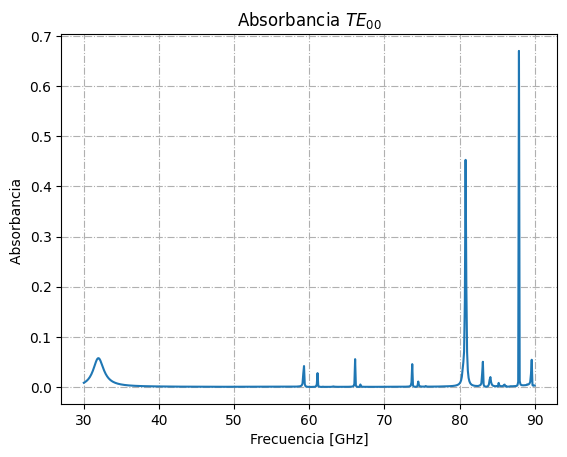

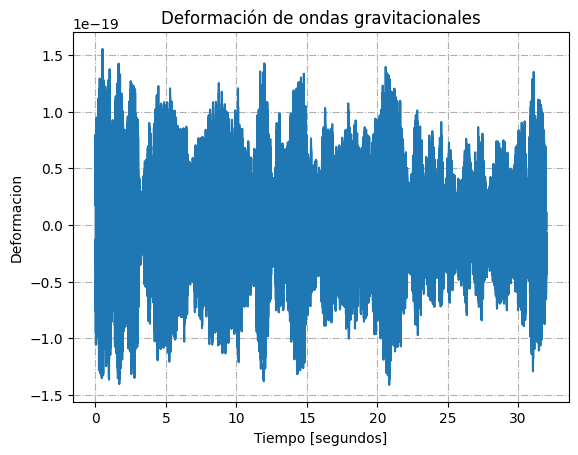

In [454]:
import pandas as pd
import matplotlib.pyplot as plt
import gzip
import numpy as np

# Carga del archivo CSV en la variable datos
datos = pd.read_csv('AbsorbanceTE_0-0.csv')
freq = datos['Freq [GHz]']
Absorbance = datos["AbsorbanceTE []"]

# Grafica de los parametros obtenidos [freq v/s Absorbance]
fig, ax = plt.subplots()
ax.grid(True, linestyle='-.')
ax.plot(freq,Absorbance)
plt.title(r'Absorbancia $TE_{00}$')
plt.xlabel("Frecuencia [GHz]")
plt.ylabel("Absorbancia ")

# Carga del archivo .gz.txt en "datos_2"
with gzip.open("H-H1_GWOSC_16KHZ_R1-1268431079-32.txt.gz", "rb") as datos_2:
    grav_waves = datos_2.readlines() # Lectura de datos
    grav_waves = grav_waves[3:] # Se usa el vector despues de los comentarios iniciales del documento

valores = []
for linea in grav_waves:
        valor = linea.strip().decode() # Se eliminan los caracteres "b" y "\n" de cada linea
        valores.append(float(valor))  # Convertir a float y agregar a la lista


# Vector de tiempo segun la frecuencia de muestreo del archivo txt
sample_freq = 16384
tiempo = np.linspace(0,len(grav_waves)/sample_freq,len(grav_waves))

# Grafica de los datos opbenidos a partir del .txt
fig2, ax = plt.subplots()
ax.plot(tiempo,valores)
ax.grid(True, linestyle='-.')
plt.xlabel("Tiempo [segundos]")
plt.title("Deformación de ondas gravitacionales")
plt.ylabel("Deformacion")
plt.show()





## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizaras para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


$x(t) = \cos(\omega t) + \cos \left(\omega t + \frac{\pi}{4}\right)$

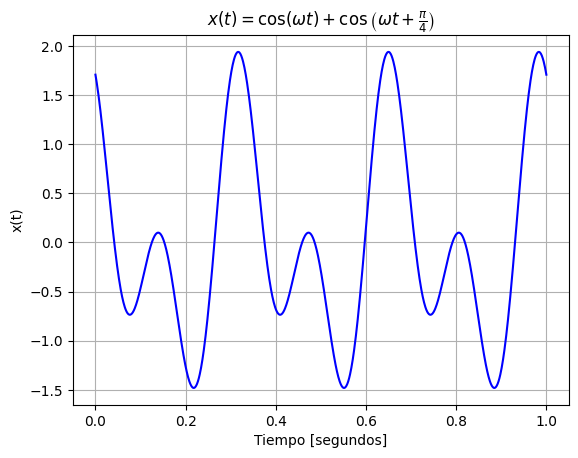

In [455]:
import numpy as np
import matplotlib.pyplot as plt

f = 3 # frecuencia de la señal continua generada
N = 1000 # cantidad de muestras del vector de tiempo
t_inicial = 0
t_final = 1

# Vector de tiempo "Continuo"
t = np.linspace(t_inicial,t_final,N)

# Señal generada
señal = np.cos(2*np.pi*f*t) + np.cos(2*2*np.pi*f*t + np.pi/4)

# Graficos
plt.plot(t,señal,color='blue')
plt.grid(True)
plt.title(r'$x(t) = \cos(\omega t) + \cos \left(\omega t + \frac{\pi}{4}\right)$')
plt.xlabel("Tiempo [segundos]")
plt.ylabel(r'x(t)')
plt.show()

## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

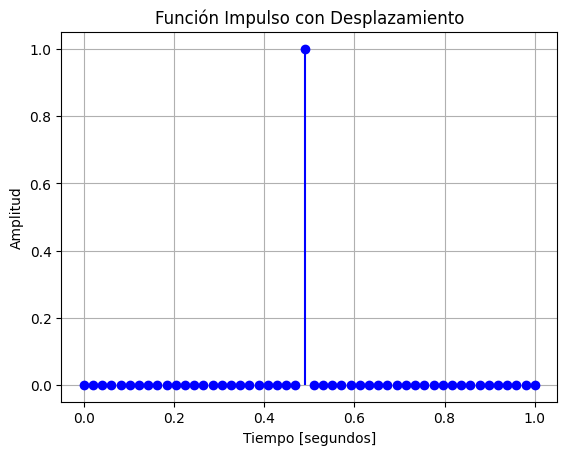

In [456]:
import numpy as np
import matplotlib.pyplot as plt

# Funcion para crear impulso
def impulso(n, desplazamiento):
    # Se crea un arreglo de 0
    impulso = np.zeros_like(n, dtype=float)
    
    # Se asigna el valor de 1 correspondiente al despalzamiento
    indice_desplazado = np.abs(n - desplazamiento).argmin()
    impulso[indice_desplazado] = 1.0
    
    return impulso

# Desplazamiento de la funcion impulso
desplazamiento = 0.5

# Frecuencia de muestreo de las señales discretas
frec_muestreo = 50
t_muestreo = np.linspace(t_inicial,t_final,(t_final-t_inicial)*frec_muestreo)
# Señal impulso
impulso_resultante = impulso(t_muestreo, desplazamiento)

# Graficamos la señal con un gráfico de tipo stem
plt.stem(t_muestreo, impulso_resultante, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.title('Función Impulso con Desplazamiento')
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

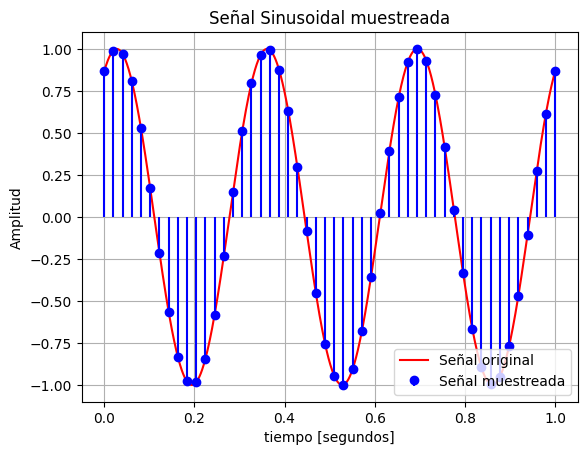

In [457]:
# Funcion sinusoidal original
sinusoidal = np.sin(2*np.pi*f*t + np.pi/3)

# Funcion sinusoidal muestreada
sin_muestreada = np.sin(2*np.pi*f*t_muestreo + np.pi/3)

# Graficos
plt.plot(t,sinusoidal,color='red')
plt.stem(t_muestreo,sin_muestreada, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.legend(["Señal original","Señal muestreada"],loc="lower right")
plt.title('Señal Sinusoidal muestreada')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


### 3.3 Genere una señal Triangular y realice la operación de sampleo

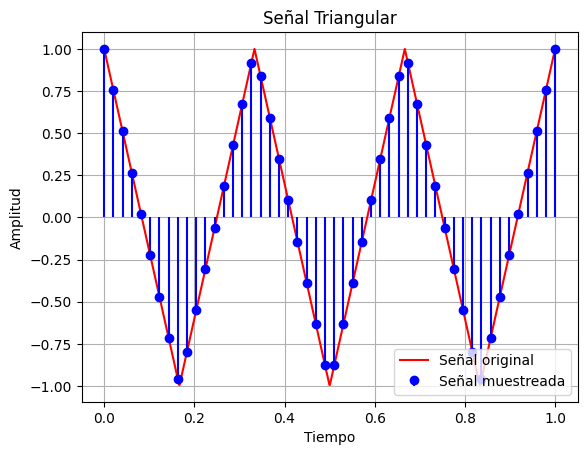

In [458]:
# Funcion para crear señal triangular continua
def triangular_signal(time, frequency):
    signal = np.abs(2 * (time % (1/frequency) * frequency) - 1)*2-1  # Generar la señal triangular
    return  signal

# Señal triangular continua
triangular = triangular_signal(t, f)

# Señal triangular discreta
triangular_muestreada = triangular_signal(t_muestreo,f)

# Graficos
plt.plot(t, triangular,color='red')
plt.stem(t_muestreo,triangular_muestreada,linefmt='b-', markerfmt='bo', basefmt=' ')
plt.legend(["Señal original","Señal muestreada"],loc="lower right")
plt.title('Señal Triangular')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

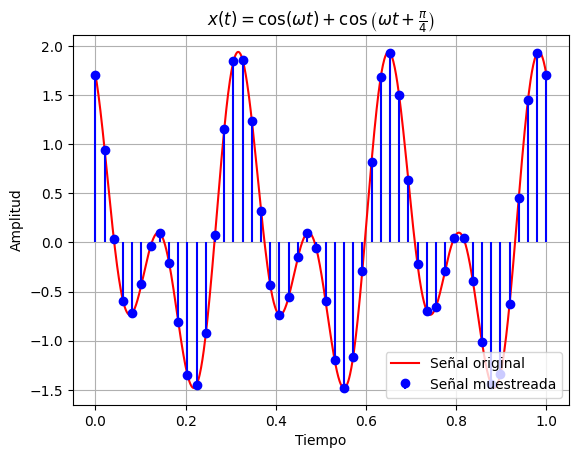

In [459]:
# Señal de sumas sinusoidales creada anteriormente (discreta)
señal_muestreada  = np.cos(2*np.pi*f*t_muestreo) + np.cos(2*2*np.pi*f*t_muestreo + np.pi/4)

# Graficos
plt.plot(t, señal,color='red')
plt.stem(t_muestreo,señal_muestreada,linefmt='b-', markerfmt='bo', basefmt=' ')
plt.legend(["Señal original","Señal muestreada"],loc="lower right")
plt.title(r'$x(t) = \cos(\omega t) + \cos \left(\omega t + \frac{\pi}{4}\right)$')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax. 

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

### Caso 1 : Señal con frecuencia de sampleo $f_{s}$ mayor a $F_{max}$

Primero, es necesario obtener la FFT de la señal para observar su frecuencia maxima

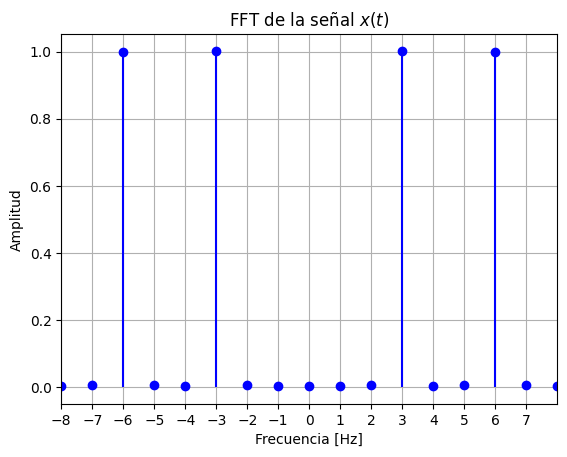

In [460]:
from scipy.fft import fft, fftfreq

# FFT de la señal
yf = fft(señal)

# Obtencion de las frecuencias para graficar
xf = fftfreq(N, t_final/N)

# Graficos
plt.stem(xf, 2.0/N * np.abs(yf),linefmt='b-', markerfmt='bo', basefmt=' ')
plt.xlim(-8,8)
plt.xticks(np.arange(-8,8,step=1))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.title(r'FFT de la señal $x(t)$')
plt.grid()
plt.show()

Donde se observa que $F_{max}$ = 6[Hz], que es igual a 2 veces la variable f de frecuencia de la señal continua, definida en un comienzo

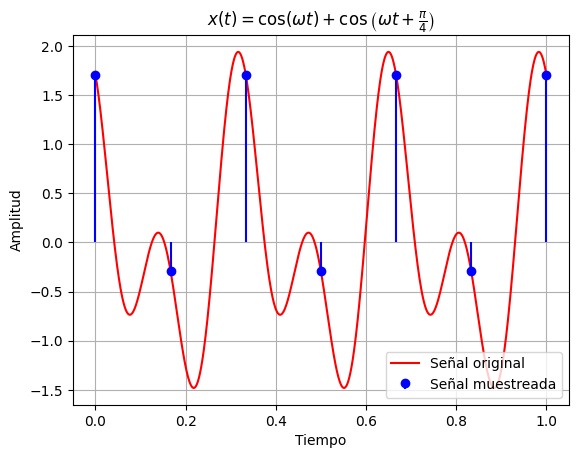

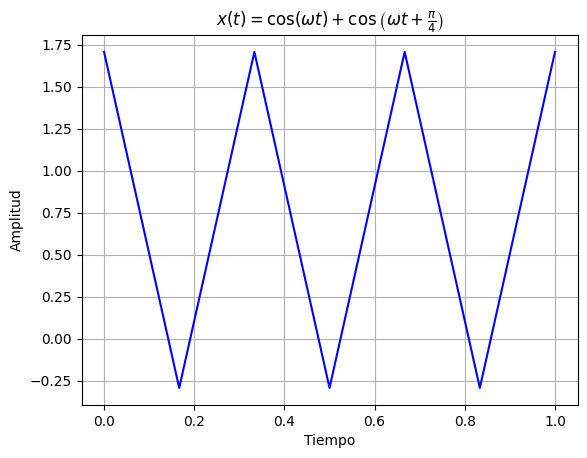

In [461]:
k = 1.2
# Nueva frecuencia de sampleo
fs = k*(2*f) 

# Tiempo de muestreo con frecuencia
t_muestreo = np.linspace(t_inicial,t_final,int((t_final-t_inicial)*fs))
#señal = np.cos(2*np.pi*f*t) + np.cos(2*2*np.pi*f*t + np.pi/4)
señal_reconstruida  = np.cos(2*np.pi*f*t_muestreo) + np.cos(2*2*np.pi*f*t_muestreo + np.pi/4)

# Graficos
plt.plot(t, señal,color='red')
plt.stem(t_muestreo,señal_reconstruida,linefmt='b-', markerfmt='bo', basefmt=' ')
plt.legend(["Señal original","Señal muestreada"],loc="lower right")
plt.title(r'$x(t) = \cos(\omega t) + \cos \left(\omega t + \frac{\pi}{4}\right)$')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

plt.plot(t_muestreo, señal_reconstruida,color='blue')
plt.title(r'$x(t) = \cos(\omega t) + \cos \left(\omega t + \frac{\pi}{4}\right)$')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()




### Caso 2: frecuencia de sampleo $f_s$ 2 veces mayor que $F_{max}$

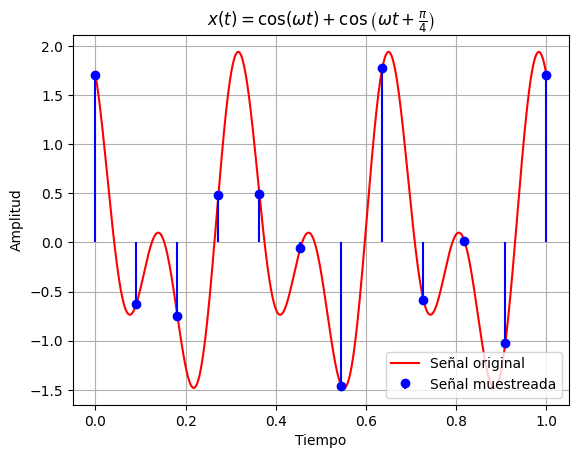

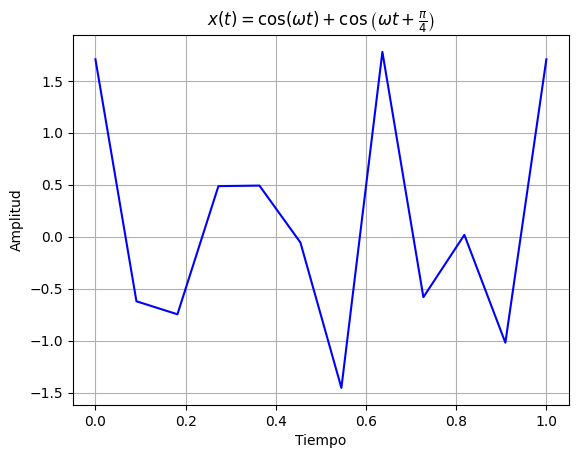

In [462]:
k = 2

# Nueva frecuencia de sampleo
fs = k*(2*f) 

# Tiempo de muestreo con frecuencia
t_muestreo = np.linspace(t_inicial,t_final,int((t_final-t_inicial)*fs))
#señal = np.cos(2*np.pi*f*t) + np.cos(2*2*np.pi*f*t + np.pi/4)
señal_reconstruida  = np.cos(2*np.pi*f*t_muestreo) + np.cos(2*2*np.pi*f*t_muestreo + np.pi/4)

# Graficos
plt.plot(t, señal,color='red')
plt.stem(t_muestreo,señal_reconstruida,linefmt='b-', markerfmt='bo', basefmt=' ')
plt.legend(["Señal original","Señal muestreada"],loc="lower right")
plt.title(r'$x(t) = \cos(\omega t) + \cos \left(\omega t + \frac{\pi}{4}\right)$')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()
plt.plot(t_muestreo, señal_reconstruida,color='blue')
plt.title(r'$x(t) = \cos(\omega t) + \cos \left(\omega t + \frac{\pi}{4}\right)$')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


### Caso 3: Frecuencia se sampleo $f_s$, 5 veces mayor que la frecuencia $F_{max}$

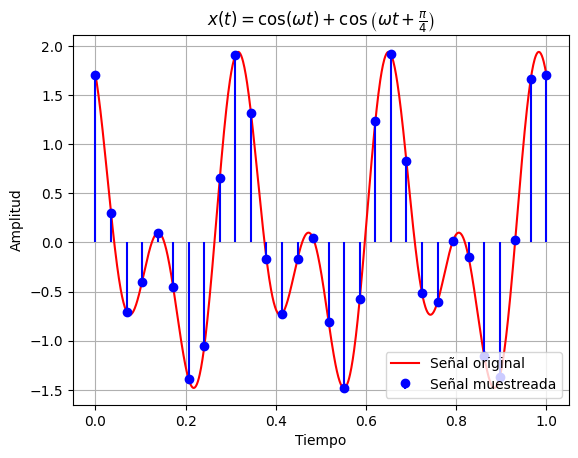

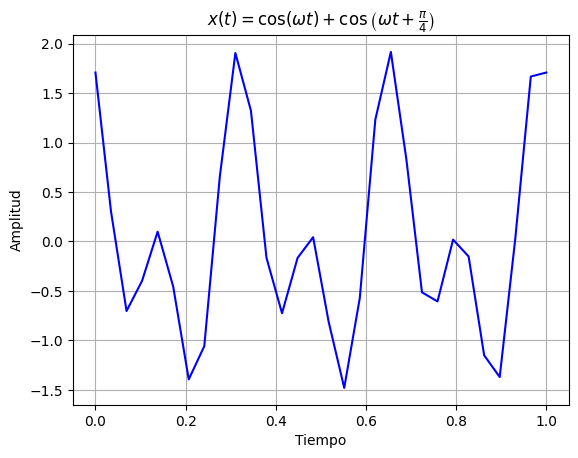

In [463]:
k = 5

# Nueva frecuencia de sampleo
fs = k*(2*f) 

# Tiempo de muestreo con frecuencia
t_muestreo = np.linspace(t_inicial,t_final,int((t_final-t_inicial)*fs))
#señal = np.cos(2*np.pi*f*t) + np.cos(2*2*np.pi*f*t + np.pi/4)
señal_reconstruida  = np.cos(2*np.pi*f*t_muestreo) + np.cos(2*2*np.pi*f*t_muestreo + np.pi/4)

# Graficos
plt.plot(t, señal,color='red')
plt.stem(t_muestreo,señal_reconstruida,linefmt='b-', markerfmt='bo', basefmt=' ')
plt.legend(["Señal original","Señal muestreada"],loc="lower right")
plt.title(r'$x(t) = \cos(\omega t) + \cos \left(\omega t + \frac{\pi}{4}\right)$')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()
plt.plot(t_muestreo, señal_reconstruida,color='blue')
plt.title(r'$x(t) = \cos(\omega t) + \cos \left(\omega t + \frac{\pi}{4}\right)$')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


### 3.6 Explica tus hallazgos

Cuando se muestrea una señal, es crucial capturar suficientes muestras para evitar el aliasing y poder reconstruir con precisión la señal continua. El teorema del muestreo de Nyquist-Shannon establece que la frecuencia de muestreo debe ser al menos el doble de la frecuencia máxima de la señal original para evitar la distorsión. Al aumentar la frecuencia de muestreo a valores como 1.2, 2 o 5 veces la frecuencia máxima de la señal, se toman suficientes muestras para capturar todos los detalles importantes de la señal original, lo que permite una mejor reconstrucción de la señal continua y un acercamiento progresivo a su forma original.

## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py